## 1. Imports

In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os 
import numpy 

## 2. Auxiliary Functionss

## 3. Loading Data Frame

In [29]:
arquivo_csv = os.path.join(os.getcwd(), "ecommerce_product_dataset.csv")

df = pd.read_csv(arquivo_csv)
df.head()

,ProductID,ProductName,Category,Price,Rating,NumReviews,StockQuantity,Discount,Sales,DateAdded,City
0,1,Headphones,Electronics,400.31,1.7,3772,20,0.08,466,2023-11-10,Albuquerque
1,2,Headphones,Electronics,235.03,2.3,2919,663,0.33,1332,2023-09-28,Queens
2,3,Smartwatch,Electronics,417.90,1.8,1184,459,0.31,252,2023-10-20,Austin
3,4,Smartphone,Electronics,152.70,3.4,2047,475,0.49,1806,2023-12-05,Dallas
4,5,Laptop,Electronics,394.74,1.8,1267,831,0.23,1508,2023-08-10,Tucson


## 4. Data Description

#### 4.1 Data Types

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ProductID      1000 non-null   int64  
 1   ProductName    1000 non-null   object 
 2   Category       1000 non-null   object 
 3   Price          1000 non-null   float64
 4   Rating         1000 non-null   float64
 5   NumReviews     1000 non-null   int64  
 6   StockQuantity  1000 non-null   int64  
 7   Discount       1000 non-null   float64
 8   Sales          1000 non-null   int64  
 9   DateAdded      1000 non-null   object 
 10  City           1000 non-null   object 
dtypes: float64(3), int64(4), object(4)
memory usage: 86.1+ KB


### N/A Data Quantities 

In [4]:
df.isnull().sum()

ProductID        0
ProductName      0
Category         0
Price            0
Rating           0
NumReviews       0
StockQuantity    0
Discount         0
Sales            0
DateAdded        0
City             0
dtype: int64

### 4.3 Converting 'DateAdded' column to datetime

In [5]:
# Converting 'DateAdded' column to datetime
df['DateAdded'] = pd.to_datetime(df['DateAdded'], errors='coerce')

### 4.4 Descriptive Statistics

In [6]:
# Separating numeric and categorical Data Frame data
atrib_numer = df.select_dtypes( include =['int64', 'float64'] )
atrib_cat = df.select_dtypes( exclude =['int64', 'float64', 'datetime64[ns]'] )

In [7]:
atrib_numer.sample(2)

,ProductID,Price,Rating,NumReviews,StockQuantity,Discount,Sales
497,498,172.90,1.2,2606,678,0.47,1164
933,934,116.69,3.5,1836,921,0.24,535


In [8]:
atrib_cat.sample(2)

,ProductName,Category,City
429,Canvas,Art and crafting materials,Washington
403,Brushes,Art and crafting materials,Portland


In [9]:
# Checking Central Tendencies
ct1 = pd.DataFrame(atrib_numer.apply( np.mean) ).T
ct2 = pd.DataFrame(atrib_numer.apply( np.median) ).T

In [10]:
# Dispersion of numerical data 
d1 = pd.DataFrame ( atrib_numer.apply (np. std ) ).T
d2 = pd.DataFrame ( atrib_numer.apply ( min ) ).T
d3 = pd.DataFrame ( atrib_numer.apply ( max ) ).T
d4 = pd.DataFrame ( atrib_numer.apply (lambda x: x.max() - x.min() ) ).T
d5 = pd.DataFrame ( atrib_numer.apply (lambda x: x.skew() ) ).T
d6 = pd.DataFrame ( atrib_numer.apply (lambda x: x.kurtosis() ) ).T

In [11]:
# Concatenating data sparseness.
metricas = pd.concat( [d2, d3, d4, ct1, ct2, d1, d5, d6] ).T.reset_index()
metricas.columns = ['atributos', 'min', 'max', 'range', 'mean', 'median', 'std', 'skew', 'kurtosis'] 

In [12]:
metricas = metricas.drop(metricas[metricas['atributos'] == 'ProductID'].index, axis=0)
metricas

,atributos,min,max,range,mean,median,std,skew,kurtosis
1,Price,10.11,499.74,489.63,253.77551,251.31,141.332900,0.031605,-1.163139
2,Rating,1.00,5.00,4.00,3.02560,3.10,1.150428,-0.078781,-1.152106
3,NumReviews,3.00,4994.00,4991.00,2498.75300,2476.00,1462.510067,0.000140,-1.243162
4,StockQuantity,0.00,993.00,993.00,495.39500,505.00,292.652816,-0.022212,-1.228884
5,Discount,0.00,0.50,0.50,0.25164,0.25,0.146381,0.000592,-1.201066
6,Sales,0.00,1997.00,1997.00,1011.03700,998.00,581.822337,-0.017176,-1.209282


<Axes: xlabel='Sales', ylabel='Density'>

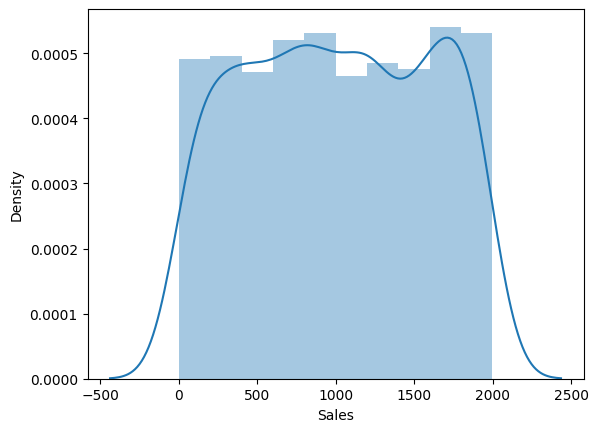

In [17]:
sns.distplot(df['Sales'])

In [14]:
atrib_cat.apply( lambda x: x.unique().shape[0] )

ProductName    100
Category        25
City           101
dtype: int64

In [15]:
df.head(3)

,ProductID,ProductName,Category,Price,Rating,NumReviews,StockQuantity,Discount,Sales,DateAdded,City
0,1,Headphones,Electronics,400.31,1.7,3772,20,0.08,466,2023-11-10,Albuquerque
1,2,Headphones,Electronics,235.03,2.3,2919,663,0.33,1332,2023-09-28,Queens
2,3,Smartwatch,Electronics,417.90,1.8,1184,459,0.31,252,2023-10-20,Austin


<Axes: xlabel='Sales', ylabel='Category'>

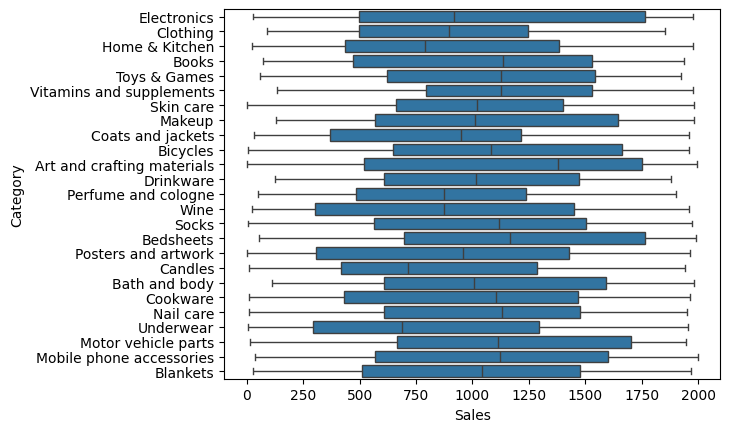

In [18]:
# Checking which categories sell 'More' and which ones sell 'Less'.
# Therefore, we found that the categories 'Electronics', 'Art and crafting materials' and 'Bedsheets' would be the 3 most profitable.
sns.boxplot(x= 'Sales', y = 'Category', data = df )

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Pittsburgh'),
  Text(1, 0, 'San Francisco'),
  Text(2, 0, 'Oklahoma City'),
  Text(3, 0, 'Spokane'),
  Text(4, 0, 'Akron'),
  Text(5, 0, 'Palm Bay'),
  Text(6, 0, 'Houston'),
  Text(7, 0, 'New York'),
  Text(8, 0, 'Queens'),
  Text(9, 0, 'Charlotte')])

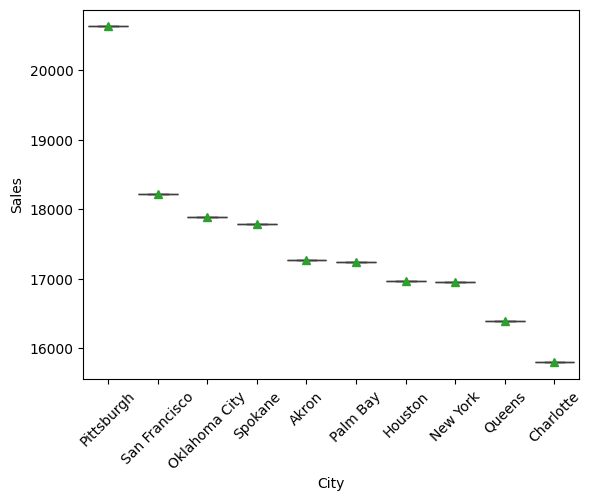

In [19]:
# Grouping sales by city and calculating the sum of sales for each city
vendas_por_cidade = df.groupby('City')['Sales'].sum().reset_index()

# Sorting cities by sales value in descending order
vendas_por_cidade = vendas_por_cidade.sort_values(by='Sales', ascending=False)

# Selecting the 10 cities that most impact our sales
top_10_cidades = vendas_por_cidade.head(10)

# Selecionando as 10 cidades com melhores vendas
sns.boxplot(
    x = 'City',
    y = 'Sales',
    showmeans= True,
    data=top_10_cidades
)

# Rotacionando os rótulos dos nomes das cidades para melhor legibilidade.
plt.xticks(rotation=45)

In [ ]:
atrib_cat.apply( lambda x: x.unique().shape[0] )

In [ ]:
# Agrupando as vendas por 10 produtos mais vendidos
vendas_por_produto = df.groupby('ProductName')['Sales'].sum().reset_index()

# Ordenando por ordem crescente, dos 10 produtos mais vendidos
vendas_por_produto = vendas_por_produto.sort_values(by='Sales', ascending=False)

# Selecionando os 10 produtos mais vendidos
top_10_produtos = vendas_por_produto.head(10)

# Selecionando os 10 produtos mais vendidos
sns.boxplot(
    x = 'ProductName',
    y = 'Sales',
    showmeans= True,
    data=top_10_produtos
)

# Rotacionando os rótulos dos nomes das cidades para melhor legibilidade.
plt.xticks(rotation=45)